In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn import random_projection

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

Checking Random Projections on MNIST: 

In [57]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [58]:
random_state = check_random_state(42)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [61]:
def splitScale(X, y, __test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=__test_size)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [62]:
X_train, X_test, y_train, y_test = splitScale(X, y)

In [63]:
lin_clf = LinearSVC(multi_class='ovr', max_iter=1000)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [64]:
print('accuracy score on test: ', accuracy_score(lin_clf.predict(X_test), y_test))

accuracy score on test:  0.9059285714285714


In [65]:
transformer = random_projection.GaussianRandomProjection(n_components=100)
X_transform = transformer.fit_transform(X)

In [66]:
print(X_transform.shape)

(70000, 100)


In [67]:
X_train, X_test, y_train, y_test = splitScale(X_transform, y)

In [68]:
lin_clf = LinearSVC(multi_class='ovr', max_iter=1000)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [69]:
print('accuracy score on transformed test data: ', 
        accuracy_score(lin_clf.predict(X_test), y_test))

accuracy score on transformed test data:  0.8785


Checking mfeat-pixel dataset:

In [70]:
# https://www.openml.org/api/v1/json/data/20

X, y = fetch_openml(data_id=20, return_X_y=True) 
print(X.shape)
print(y.shape)

(2000, 240)
(2000,)


In [71]:
random_state = check_random_state(42)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [72]:
X_train, X_test, y_train, y_test = splitScale(X, y, 0.2)

In [73]:
lin_clf = LinearSVC(multi_class='ovr', max_iter=1000)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [74]:
print('accuracy score on test: ', accuracy_score(lin_clf.predict(X_test), y_test))

accuracy score on test:  0.9175


In [75]:
transformer = random_projection.GaussianRandomProjection(n_components=100)
X_transform = transformer.fit_transform(X)

In [76]:
print(X_transform.shape)

(2000, 100)


In [77]:
X_train, X_test, y_train, y_test = splitScale(X_transform, y, 0.2)

In [78]:
lin_clf = LinearSVC(multi_class='ovr', max_iter=1000)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [80]:
print('accuracy score on transformed test data: ', 
        accuracy_score(lin_clf.predict(X_test), y_test))

accuracy score on transformed test data:  0.95


In [87]:
test_scores = np.zeros(X.shape[1])

for i in range(1, X.shape[1]):
    transformer = random_projection.GaussianRandomProjection(n_components=i, random_state=42)
    X_transform = transformer.fit_transform(X)
    X_train, X_test, y_train, y_test = splitScale(X_transform, y, 0.2)
    
    lin_clf = LinearSVC(multi_class='ovr', max_iter=1000)
    lin_clf.fit(X_train, y_train)
    
    test_scores[i] = accuracy_score(lin_clf.predict(X_test), y_test)

Text(0.5,1,'Random projections with different # components')

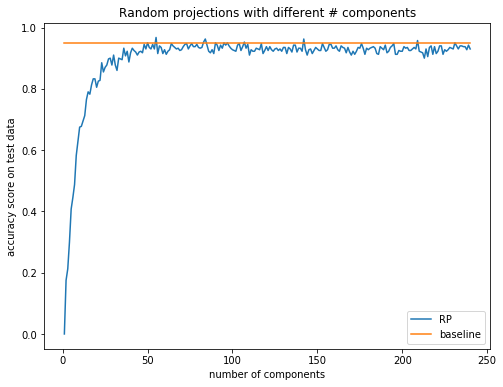

In [101]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, X.shape[1] + 1), test_scores)
plt.plot(np.arange(1, X.shape[1] + 1), np.ones(X.shape[1]) * 0.95)
plt.gca().legend(("RP", "baseline"))
plt.xlabel("number of components")
plt.ylabel("accuracy score on test data")
plt.title("Random projections with different # components")